In [1]:
import tensorflow
from tensorflow.keras.layers import *

In [2]:


fldir=r"C:\Users\Ashish\Desktop\OpenCV\archive\UTKFace"

In [3]:
import os
files=os.listdir(fldir)

In [4]:
import cv2
ages=[]
genders=[]
images=[]

for file in files:
    age=int(file.split('_')[0])
    gender=int(file.split('_')[1])
    ages.append(age)
    genders.append(gender)
    total=fldir+'/'+file
    print(total)
    image=cv2.imread(total)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)



C:\Users\Ashish\Desktop\OpenCV\archive\UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
C:\Users\Ashish\Desktop\OpenCV\archive\UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
C:\Users\Ashish\Desktop\OpenCV\archive\UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
C:\Users\Ashish\Desktop\OpenCV\archive\UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
C:\Users\Ashish\Desktop\OpenCV\archive\UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
C:\Users\Ashish\Desktop\OpenCV\archive\UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
C:\Users\Ashish\Desktop\OpenCV\archive\UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
C:\Users\Ashish\Desktop\OpenCV\archive\UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
C:\Users\Ashish\Desktop\OpenCV\archive\UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
C:\Users\Ashish\Desktop\OpenCV\archive\UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
C:\Users\Ashish\Desktop\OpenCV\archive\UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
C:\Users\Ashish\Desktop\OpenCV\archive\UTKFace/101_0_0

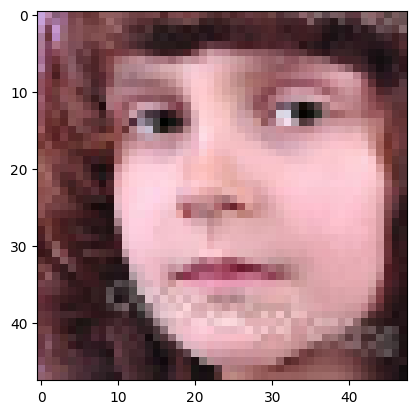

In [5]:
import matplotlib.pyplot as plt
plt.imshow(images[147])

In [6]:
import numpy as np
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [7]:
np.save(fldir+'image.npy',images_f)
np.save(fldir+'ages.npy',ages_f)
np.save(fldir+'genders.npy',genders_f)

In [8]:
values,count=np.unique(genders_f,return_counts=True)
print(count)

[12391 11317]


In [9]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i+=1

In [10]:
images_f_2=images_f/255
labels_f=np.array(labels)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(images_f_2,labels_f,test_size=0.25)

In [12]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

## Defining the model


In [13]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras import Model
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [14]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_2,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten=Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='gender_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy"])
    return model





In [15]:
Model=model((48,48,3))

In [16]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 32)           896       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 48, 48, 32)           0         ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 48, 48, 32)           0         ['dropout[0][0]']             
                                                                                              

## Initializing the Model

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint
file_s="Age_Sex_Detection.h5"
checkpoint=ModelCheckpoint(file_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode="auto",save_freq='epoch')
Early_stop=tensorflow.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]


## Running the Model

In [18]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=25,callbacks=callback_list)

Epoch 1/25


278/278 [==============================] - ETA: 0s - loss: 16.7919 - sex_out_loss: 0.6545 - gender_out_loss: 16.0422 - sex_out_accuracy: 0.6125 - gender_out_accuracy: 0.0450
Epoch 1: val_loss improved from inf to 15.84634, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 79s 268ms/step - loss: 16.7919 - sex_out_loss: 0.6545 - gender_out_loss: 16.0422 - sex_out_accuracy: 0.6125 - gender_out_accuracy: 0.0450 - val_loss: 15.8463 - val_sex_out_loss: 0.5865 - val_gender_out_loss: 15.1675 - val_sex_out_accuracy: 0.7078 - val_gender_out_accuracy: 0.0531


c:\Users\Ashish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/25
278/278 [==============================] - ETA: 0s - loss: 12.8788 - sex_out_loss: 0.5257 - gender_out_loss: 12.2379 - sex_out_accuracy: 0.7407 - gender_out_accuracy: 0.0450
Epoch 2: val_loss improved from 15.84634 to 13.08673, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 77s 276ms/step - loss: 12.8788 - sex_out_loss: 0.5257 - gender_out_loss: 12.2379 - sex_out_accuracy: 0.7407 - gender_out_accuracy: 0.0450 - val_loss: 13.0867 - val_sex_out_loss: 0.4683 - val_gender_out_loss: 12.4865 - val_sex_out_accuracy: 0.7795 - val_gender_out_accuracy: 0.0469
Epoch 3/25
278/278 [==============================] - ETA: 0s - loss: 11.0040 - sex_out_loss: 0.4346 - gender_out_loss: 10.4247 - sex_out_accuracy: 0.7939 - gender_out_accuracy: 0.0414
Epoch 3: val_loss improved from 13.08673 to 11.57220, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 79s 284ms/step - loss: 11.0040 - sex_out_loss: 0.4346 - gender_out_loss: 10.4247 

In [19]:
Model.evaluate(X_test,Y_test_2)
pred=Model.predict(X_test)


186/186 [==============================] - 4s 20ms/step


## Plotting Loss


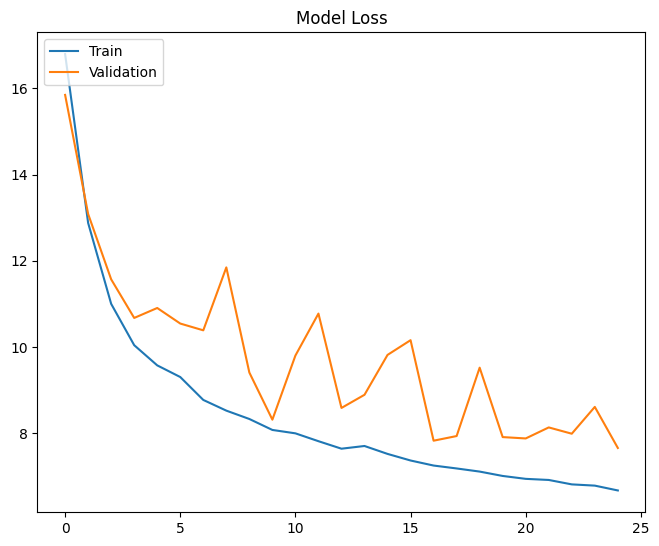

In [20]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylable=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

## Plotting Model Accuracy

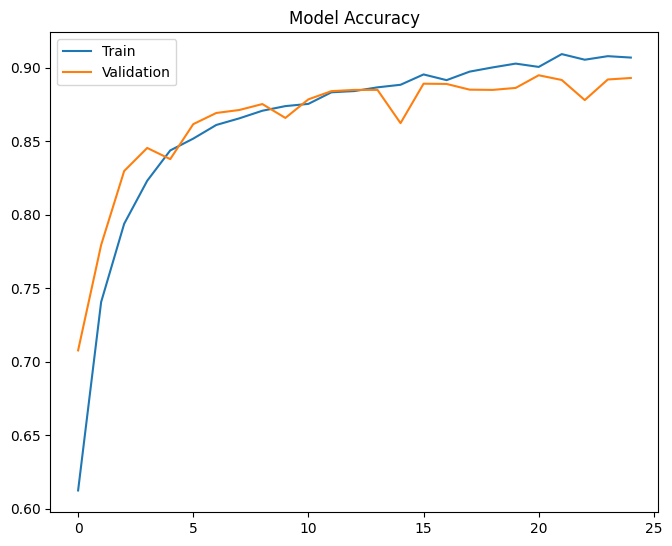

In [21]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylable=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

## Plotting Gender Accuracy

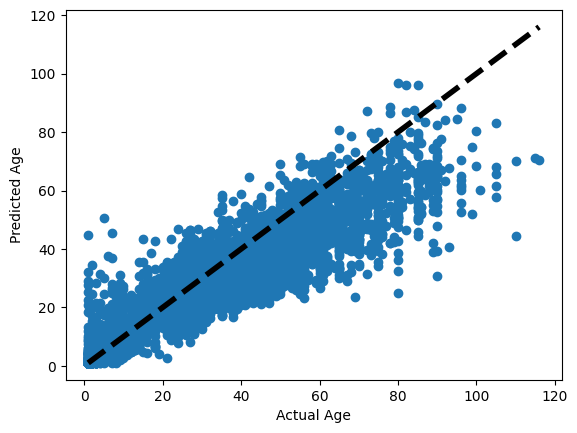

In [22]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

## Making Report of the Model

In [23]:
i=0
Pred_l=[]
while (i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i+=1
    

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
report=classification_report(Y_test_2[0],Pred_l)
print(report)


              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3124
           1       0.89      0.89      0.89      2803

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927



## Making Heatmap

<Axes: >

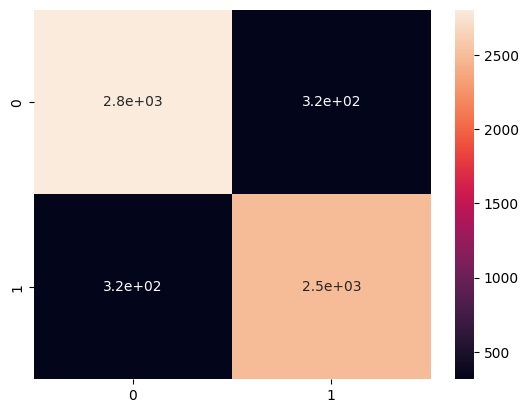

In [25]:
results=confusion_matrix(Y_test_2[0],Pred_l)
import seaborn as sns
sns.heatmap(results,annot=True)

## Testing Images

In [26]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted age is"+ str(age))
    print("Predicted gender is"+ sex_f[sex])


## Test 1

1/1 [==============================] - 0s 34ms/step
Predicted age is6
Predicted gender isFemale


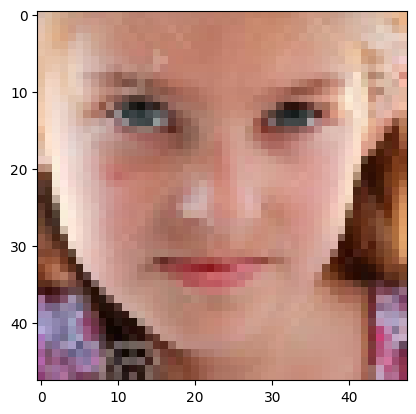

In [29]:
test_image(143,images_f,images_f_2,Model)